In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np

from src.camera import Camera
from src.image_processing_pipeline import ImageProcessingPipeline

In [2]:
camera = Camera.create("camera_cal/calibration*.jpg")
camera.calibrate()

Text(0.5, 1.0, 'Undistorted Image')

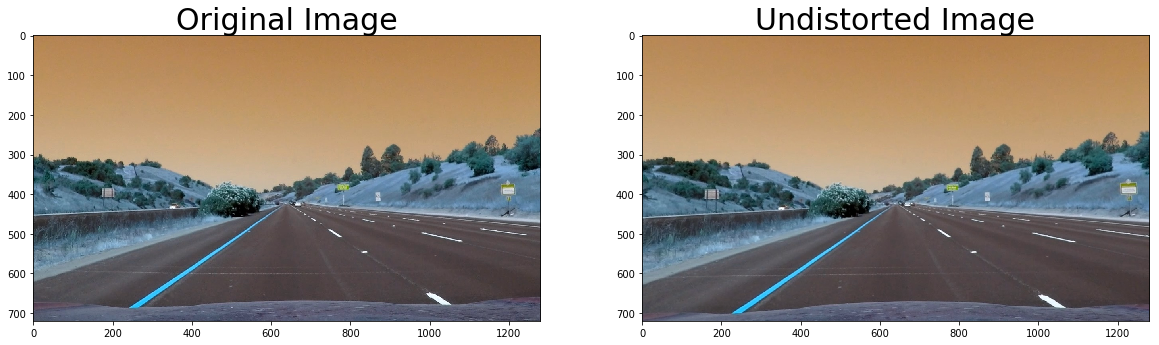

In [3]:
distorted_image = cv2.imread('test_images/straight_lines1.jpg')
undistorted_image = camera.undistort(distorted_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(distorted_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=30)

TypeError: Image data cannot be converted to float

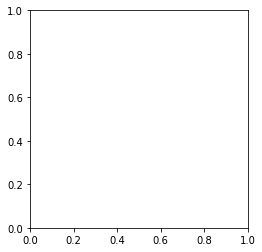

In [4]:
pipeline = ImageProcessingPipeline(camera)

processed = pipeline.process(undistorted_image)

pipeline.sobel_thresh = (10, 100)
pipeline.sobel_kernel = 15
pipeline.mag_thresh = (20, 120)
pipeline.dir_thresh = (0.5, 1.5)
pipeline.color_thresh = (90, 255)

plt.imshow(pipeline.process(undistorted_image), cmap='gray')